In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
print(tf.__version__)

2.5.0


# Extracting Data from Uploaded Zipfile

In [ ]:
from zipfile import ZipFile
file_name = "true_archive.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


# Creating Custom Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('loss') < 0.002):
      print("Desired Accuracy achievd")
      self.model.stop_training = True

callbacks = myCallback()

# Auto labelling Data 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size = (150,150),
    class_mode = 'binary',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    'Test',
    target_size = (150,150),
    class_mode = 'binary',
    batch_size = 128
)

Found 4094 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


# Creating Directories

In [ ]:
import os 
train_dir = '/content/Train'
test_dir = '/content/Test'
train_tumor_dir = '/content/Train/Brain Tumor'
train_healthy_dir = '/content/Train/Healthy'

train_tumor_fnames = os.listdir(train_tumor_dir)
train_health_fnames = os.listdir(train_healthy_dir)

# View Data

Image of a Brain with Tumor 

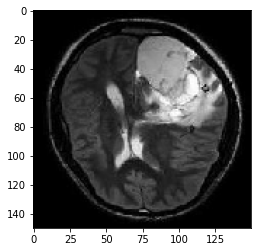

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_tumor_dir, train_tumor_fnames[6])
img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


i = 0
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 1 == 0:
    break


Image of a Healthy Brain

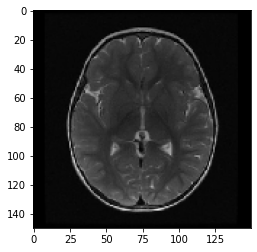

In [ ]:
img_path = os.path.join(train_healthy_dir, train_health_fnames[1])
img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


i = 0
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 1 == 0:
    break

# Model

In [ ]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.3),

                             tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.3),

                            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Dropout(0.3),

                            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Dropout(0.3),

                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs = 45,
    validation_data = validation_generator,
    callbacks = [callbacks]
)

Epoch 1/45
32/32 [==============================] - 49s 478ms/step - loss: 1.2925 - accuracy: 0.6856 - val_loss: 1.2537 - val_accuracy: 0.4130
Epoch 2/45
32/32 [==============================] - 13s 389ms/step - loss: 0.4610 - accuracy: 0.7863 - val_loss: 0.9980 - val_accuracy: 0.4130
Epoch 3/45
32/32 [==============================] - 13s 393ms/step - loss: 0.3589 - accuracy: 0.8425 - val_loss: 0.9930 - val_accuracy: 0.4130
Epoch 4/45
32/32 [==============================] - 12s 385ms/step - loss: 0.2585 - accuracy: 0.8903 - val_loss: 2.0488 - val_accuracy: 0.4130
Epoch 5/45
32/32 [==============================] - 12s 387ms/step - loss: 0.2048 - accuracy: 0.9206 - val_loss: 1.4725 - val_accuracy: 0.4170
Epoch 6/45
32/32 [==============================] - 12s 390ms/step - loss: 0.1421 - accuracy: 0.9431 - val_loss: 0.5701 - val_accuracy: 0.8360
Epoch 7/45
32/32 [==============================] - 12s 386ms/step - loss: 0.1156 - accuracy: 0.9565 - val_loss: 0.6819 - val_accuracy: 0.6779

# Plot of Loss and Accuracy

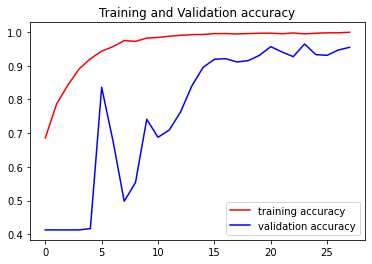

<Figure size 432x288 with 0 Axes>

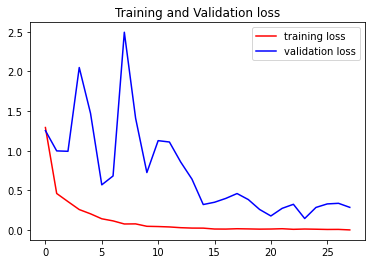

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
